# Uncertainty Analysis
___

In [1]:
clustering_strategy = 'BGMM'

## Setup

### Importing Packages

In [2]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.float_format", "{:.2e}".format)

### Directories

In [3]:
# Data Root Directory
data_root_dir = os.path.join(os.getcwd(), 'Data')

# Test Subset Directory
test_subset_dir = os.path.join(data_root_dir, f'{clustering_strategy}_test_subset.parquet')

# Plot Directory
plot_dir = os.path.join(data_root_dir, 'Analysis_Plots')

In [4]:
data = pd.read_parquet(test_subset_dir)
print(data.shape)

(13686, 667)


In [5]:
columns = [col for col in data.columns if 'manual' in col]
for col in columns:
    print(col)

disk-edge-on_manual-total
disk-edge-on_yes_manual-fraction
disk-edge-on_no_manual-fraction
merging_manual-total
merging_merger_manual-fraction
merging_tidal-debris_manual-fraction
merging_both_manual-fraction
merging_neither_manual-fraction
smooth-or-featured_manual-total
smooth-or-featured_smooth_manual-fraction
smooth-or-featured_featured-or-disk_manual-fraction
smooth-or-featured_artifact_manual-fraction
how-rounded_manual-total
how-rounded_completely_manual-fraction
how-rounded_in-between_manual-fraction
how-rounded_cigar-shaped_manual-fraction
has-spiral-arms_manual-total
has-spiral-arms_yes_manual-fraction
has-spiral-arms_no_manual-fraction


### Plot number of votes versus distance to cluster

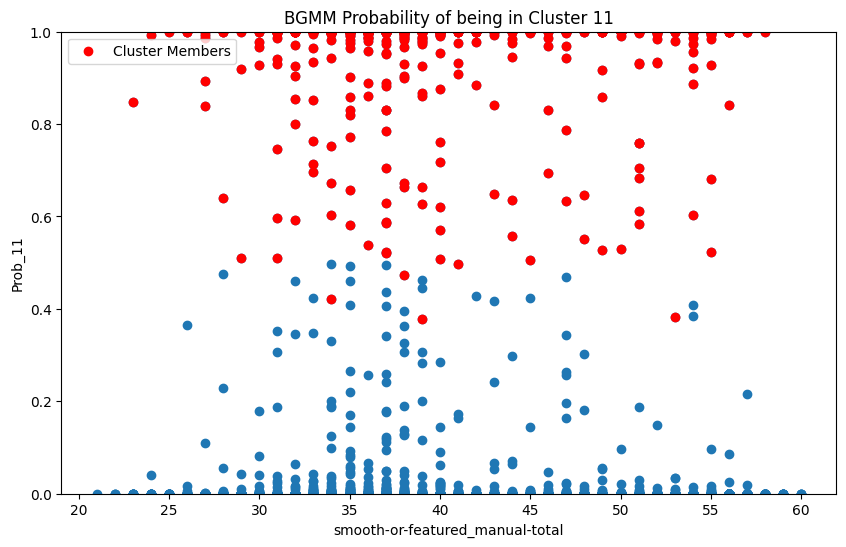

In [10]:
cluster = 11
cluster_subset = data[data['Cluster'] == cluster]
plt.figure(figsize=(10,6))
plt.scatter(data['smooth-or-featured_manual-total'], data[f'Prob_{cluster}'])
plt.scatter(cluster_subset['smooth-or-featured_manual-total'], cluster_subset[f'Prob_{cluster}'], color='red', label='Cluster Members')
plt.xlabel('smooth-or-featured_manual-total')
plt.ylabel(f'Prob_{cluster}')
plt.ylim(0, 1)
plt.title(f'{clustering_strategy} Probability of being in Cluster {cluster}')
plt.legend()
plt.savefig(f'{plot_dir}/{clustering_strategy}_cluster_{cluster}.png')
plt.show()